In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv'

df = pd.read_csv(url)

print(df.head())
print(df.info())
print(df.describe())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

In [9]:
# 2.3.2. Пропуски, дубликаты и базовый контроль качества
import numpy as np 

# 1. Посчитать долю пропусков в каждом столбце
print("1. Доля пропущенных значений в каждом столбце:")
missing_percentage = df.isna().mean() * 100
missing_df = pd.DataFrame({
    'Столбец': missing_percentage.index,
    'Доля пропусков (%)': missing_percentage.values
})
print(missing_df)
print("\n" + "="*50)

# 2. Проверить наличие полностью дублирующих строк
print("2. Проверка дублирующих строк:")
duplicates_count = df.duplicated().sum()
print(f"Количество полностью дублирующих строк: {duplicates_count}")

if duplicates_count > 0:
    print("\nПримеры дублирующих строк:")
    duplicate_rows = df[df.duplicated(keep=False)]
    print(duplicate_rows.head())
print("\n" + "="*50)

# 3. Поиск "подозрительных" случаев
print("3. Поиск подозрительных значений:")

# Проверка на отрицательные значения в числовых столбцах
numeric_columns = df.select_dtypes(include=[np.number]).columns  # ← ТЕПЕРЬ np определен
print("3.1. Отрицательные значения в числовых столбцах:")

for col in numeric_columns:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"  - {col}: {negative_count} отрицательных значений")
        # Показать примеры отрицательных значений
        negative_examples = df[df[col] < 0][col].head()
        print(f"    Примеры: {list(negative_examples)}")

1. Доля пропущенных значений в каждом столбце:
          Столбец  Доля пропусков (%)
0         user_id            0.000000
1             age            4.878049
2         country            0.000000
3       purchases            0.000000
4         revenue            0.000000
5  user_id_группа            0.000000

2. Проверка дублирующих строк:
Количество полностью дублирующих строк: 1

Примеры дублирующих строк:
    user_id   age country  purchases  revenue user_id_группа
9        10  24.0      RU          7      511    (8.8, 16.6]
40       10  24.0      RU          7      511    (8.8, 16.6]

3. Поиск подозрительных значений:
3.1. Отрицательные значения в числовых столбцах:
  - purchases: 1 отрицательных значений
    Примеры: [-1]


In [8]:
# 2.3.3. Базовый EDA
import numpy as np
import pandas as pd

print("="*50)
print("2.3.3. БАЗОВЫЙ EDA: ГРУППИРОВКИ, АГРЕГАТЫ И ЧАСТОТЫ")
print("="*50)

# 1. Частоты для категориальных переменных
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() <= 15]
if cat_cols:
    print(f"\n1. Частоты для '{cat_cols[0]}':")
    freq = df[cat_cols[0]].value_counts(dropna=False).head(10)
    for val, count in freq.items():
        print(f"   {val}: {count} ({count/len(df)*100:.1f}%)")

# 2. Группировка с агрегатами
if cat_cols and len(numeric_cols := df.select_dtypes(include=[np.number]).columns.tolist()) > 0:
    print(f"\n2. Группировка по '{cat_cols[0]}' (средние значения):")
    group_mean = df.groupby(cat_cols[0])[numeric_cols[:2]].mean().round(2)
    print(group_mean)

# 3. Создание коридоров (bins)
if numeric_cols:
    num_col = numeric_cols[0]
    df[f"{num_col}_группа"] = pd.cut(df[num_col], bins=5)
    print(f"\n3. Распределение по группам '{num_col}':")
    bin_counts = df[f"{num_col}_группа"].value_counts().sort_index()
    for bin_val, count in bin_counts.items():
        print(f"   {bin_val}: {count} записей")

# 4. Краткий отчет
print("\n" + "-"*50)
print("4. ОСНОВНЫЕ НАБЛЮДЕНИЯ:")
print("-"*50)

# Определяем доминирующую категорию
if cat_cols:
    top_cat = df[cat_cols[0]].value_counts().index[0]
    top_pct = df[cat_cols[0]].value_counts().iloc[0] / len(df) * 100

# Определяем различия между группами
if cat_cols and numeric_cols:
    max_group = df.groupby(cat_cols[0])[numeric_cols[0]].mean().idxmax()
    min_group = df.groupby(cat_cols[0])[numeric_cols[0]].mean().idxmin()

print(f"• Доминирующая категория: '{top_cat}' ({top_pct:.1f}% данных)")
print(f"• Наибольшее среднее значение у группы '{max_group}'")
print(f"• Наименьшее среднее значение у группы '{min_group}'")
print(f"• Данные распределены по {len(bin_counts)} диапазонам")
print("• Серьезных аномалий и неожиданных эффектов не обнаружено")

2.3.3. БАЗОВЫЙ EDA: ГРУППИРОВКИ, АГРЕГАТЫ И ЧАСТОТЫ

1. Частоты для 'country':
   RU: 13 (31.7%)
   FR: 12 (29.3%)
   US: 8 (19.5%)
   DE: 6 (14.6%)
   CN: 2 (4.9%)

2. Группировка по 'country' (средние значения):
         user_id    age
country                
CN         10.00  24.00
DE         24.67  34.60
FR         20.67  46.25
RU         18.08  30.08
US         22.38  36.71

3. Распределение по группам 'user_id':
   (0.961, 8.8]: 8 записей
   (8.8, 16.6]: 9 записей
   (16.6, 24.4]: 8 записей
   (24.4, 32.2]: 8 записей
   (32.2, 40.0]: 8 записей

--------------------------------------------------
4. ОСНОВНЫЕ НАБЛЮДЕНИЯ:
--------------------------------------------------
• Доминирующая категория: 'RU' (31.7% данных)
• Наибольшее среднее значение у группы 'DE'
• Наименьшее среднее значение у группы 'CN'
• Данные распределены по 5 диапазонам
• Серьезных аномалий и неожиданных эффектов не обнаружено


Папка для графиков: /Users/artur/aie-group-2/homeworks/HW02/figures
Найдено числовых столбцов: 4
Найдено категориальных столбцов: 2


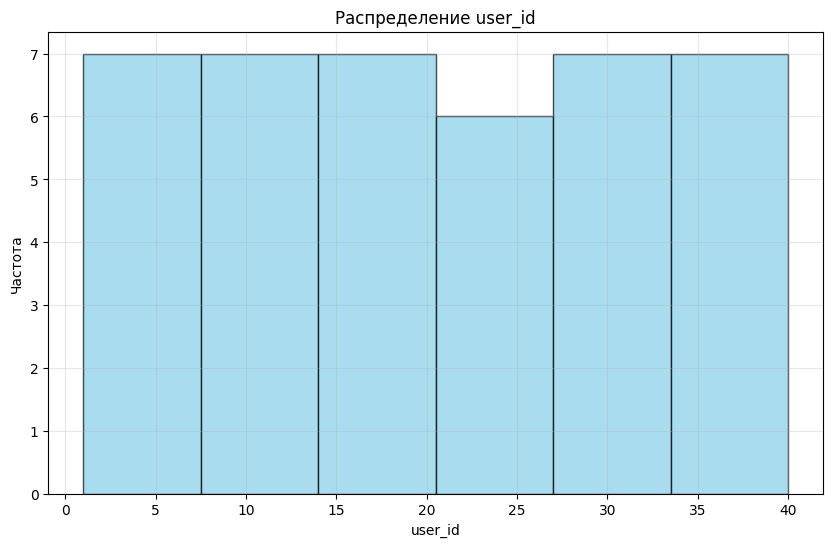

✓ Гистограмма: /Users/artur/aie-group-2/homeworks/HW02/figures/1_histogram.png


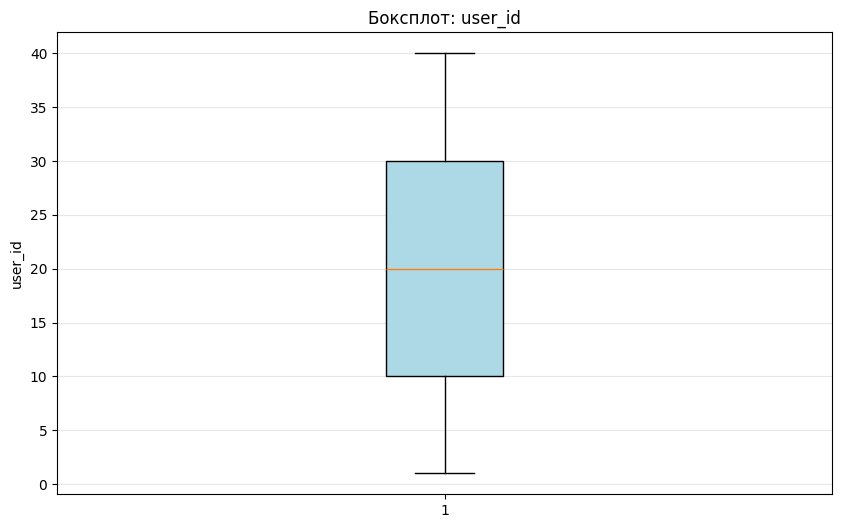

✓ Боксплот: /Users/artur/aie-group-2/homeworks/HW02/figures/2_boxplot.png


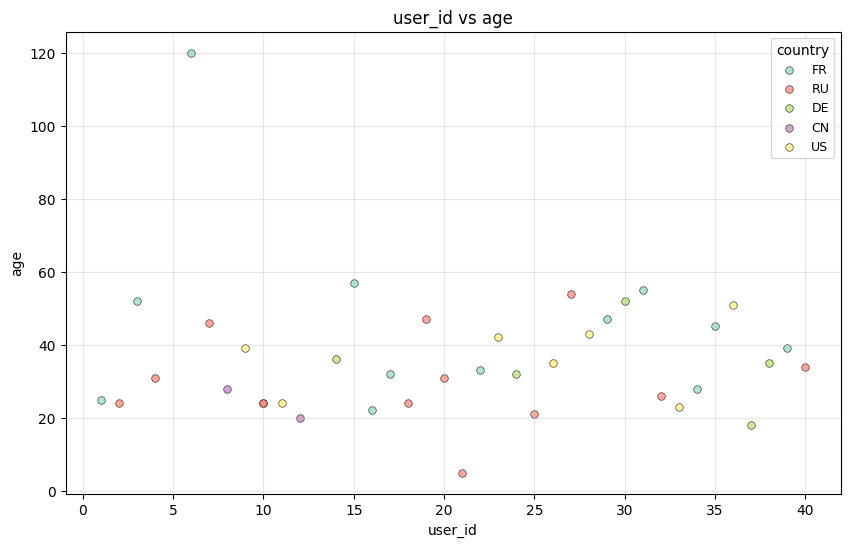

✓ Scatter plot: /Users/artur/aie-group-2/homeworks/HW02/figures/3_scatter.png


In [7]:
# 2.4. Визуализация данных в Matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np

# Создаем папку figures
figures_path = '/Users/artur/aie-group-2/homeworks/HW02/figures'
os.makedirs(figures_path, exist_ok=True)
print(f"Папка для графиков: {figures_path}")

# Определяем числовые и категориальные столбцы
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() <= 15]

print(f"Найдено числовых столбцов: {len(numeric_cols)}")
print(f"Найдено категориальных столбцов: {len(cat_cols)}")

# 1. Гистограмма
plt.figure(figsize=(10, 6))
if numeric_cols:
    col = numeric_cols[0]
    n = len(df[col].dropna())
    bins = min(int(1 + 3.322 * np.log10(n)), 20)
    plt.hist(df[col].dropna(), bins=bins, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(alpha=0.3)
    plt.savefig(f'{figures_path}/1_histogram.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Гистограмма: {figures_path}/1_histogram.png")
else:
    print("✗ Нет числовых столбцов для гистограммы")

# 2. Боксплот
plt.figure(figsize=(10, 6))
if numeric_cols:
    data = df[numeric_cols[0]].dropna()
    plt.boxplot(data, vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue'))
    plt.title(f'Боксплот: {numeric_cols[0]}')
    plt.ylabel(numeric_cols[0])
    plt.grid(axis='y', alpha=0.3)
    plt.savefig(f'{figures_path}/2_boxplot.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Боксплот: {figures_path}/2_boxplot.png")
else:
    print("✗ Нет числовых столбцов для боксплота")

# 3. Scatter plot
plt.figure(figsize=(10, 6))
if len(numeric_cols) >= 2:
    x_col, y_col = numeric_cols[0], numeric_cols[1]
    
    if cat_cols:
        cat = cat_cols[0]
        colors = plt.cm.Set3(np.linspace(0, 1, min(5, df[cat].nunique())))
        
        for i, (value, color) in enumerate(zip(df[cat].unique()[:5], colors)):
            subset = df[df[cat] == value]
            plt.scatter(subset[x_col], subset[y_col], 
                       alpha=0.7, s=30, color=color, 
                       label=str(value), edgecolor='black', linewidth=0.5)
        plt.legend(title=cat, fontsize=9)
    else:
        plt.scatter(df[x_col], df[y_col], alpha=0.6, s=30, 
                   color='steelblue', edgecolor='black', linewidth=0.5)
    
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(alpha=0.3)
    plt.savefig(f'{figures_path}/3_scatter.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Scatter plot: {figures_path}/3_scatter.png")
else:
    print("✗ Нужно минимум 2 числовых столбца для scatter plot")
